In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
# for excel file install package xlrd, openpyxl   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
pd.set_option('display.max_colwidth', None)


In [2]:
df_train_new = pd.read_csv("train_data.csv",low_memory = False)
df_train_new.head(10)

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,next_month_plan
0,6875768,0,0,0,0,0,219,761.62,6317.0,2.773958,622.685848,210.566667,30.0,197.116822,0.0,0.000000,0.0,0.0,0.000000,0.000000,677.0,152.866667,0.0,27.0,25.074074,34.759221,0.0,1.0,2
1,6406277,0,0,0,1,0,36,2482.52,28365.0,3.079438,2569.429138,945.500000,30.0,573.299639,0.0,0.000000,0.0,0.0,0.000000,0.000000,76.0,35.433333,0.0,15.0,5.066667,6.779644,0.0,0.0,1
2,3563570,0,0,0,2,1,186,1565.55,18581.0,48.193713,2739.515326,619.366667,30.0,619.750500,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,6
3,1853666,0,0,1,3,0,24,2397.49,91071.0,22.437842,7523.355693,3035.700000,30.0,2174.203127,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,4
4,2794331,0,0,1,2,2,37,2501.75,19736.0,53.302092,1239.220170,657.866667,30.0,329.152516,0.0,0.000000,0.0,0.0,0.000000,0.000000,258.0,87.616667,0.0,23.0,11.217391,16.224071,0.0,1.0,4
5,3619017,1,1,0,1,0,30,495.54,0.0,0.001531,0.173772,0.000000,30.0,0.034965,0.0,0.000000,0.0,0.0,0.000000,0.000000,2.0,1.066667,0.0,3.0,0.666667,0.233432,0.0,0.0,1
6,7633257,0,0,0,0,1,35,1977.19,14782.0,205.394300,1001.028832,492.733333,30.0,177.211955,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,5
7,5507217,0,0,0,4,1,170,2925.00,3473.0,6.426329,1132.109515,115.766667,30.0,222.353815,43.0,9.966667,0.0,7.0,6.142857,2.939495,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,5
8,7566055,0,0,0,5,3,48,473.59,3870.0,0.000000,1180.032728,552.857143,7.0,337.334503,7.0,6.700000,0.0,2.0,3.500000,1.313412,34.0,22.883333,0.0,3.0,11.333333,4.661264,0.0,0.0,2
9,7324903,0,0,0,3,3,81,1324.60,20876.0,3.450117,1290.141176,695.866667,30.0,334.779967,7.0,7.400000,0.0,1.0,7.000000,1.351049,11.0,6.816667,0.0,6.0,1.833333,1.310881,0.0,0.0,2


In [3]:
df_train_new.shape

(10337, 29)

In [12]:
df_train_new.describe()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,next_month_plan
count,1.033700e+04,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.0,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000
mean,5.526566e+06,0.127406,0.162620,0.283351,5.368579,1.613621,92.355326,2073.536227,12822.057947,72.791372,1439.477078,452.575536,24.873271,329.733731,23.019638,6.110051,0.0,0.766470,3.155612,1.503010,68.076521,14.769213,0.024960,9.032698,4.446226,3.509481,0.053691,0.248331,3.048273
std,2.599264e+06,0.398236,0.572833,0.450647,4.776180,1.470518,71.756398,1443.351537,15828.478429,168.707200,1831.513236,545.031896,9.598892,401.139955,121.534384,23.455838,0.0,2.733809,11.546028,6.071084,130.690873,22.013646,0.363812,9.462719,6.900577,5.228623,0.238351,0.501501,2.048722
min,1.000454e+06,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-11446.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.279250e+06,0.000000,0.000000,0.000000,3.000000,1.000000,22.000000,1036.770000,1994.000000,0.000000,371.961535,82.827586,25.000000,91.389576,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.526201e+06,0.000000,0.000000,0.000000,3.000000,1.000000,83.000000,1781.110000,7880.000000,2.442451,978.549969,288.833333,30.000000,232.894687,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,18.000000,6.983333,0.000000,6.000000,2.500000,1.648548,0.000000,0.000000,3.000000
75%,7.792287e+06,0.000000,0.000000,1.000000,6.000000,3.000000,149.000000,2692.550000,17839.000000,64.968723,1837.677878,626.400000,30.000000,424.299010,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,86.000000,21.166667,0.000000,16.000000,5.875000,5.032031,0.000000,0.000000,5.000000
max,9.999195e+06,2.000000,5.000000,1.000000,25.000000,6.000000,314.000000,19007.890000,176410.000000,3501.540916,30513.071629,7386.052632,30.000000,6913.568069,3009.000000,423.283333,0.0,29.000000,221.000000,122.293736,2642.000000,477.300000,25.566667,30.000000,107.944444,90.944793,3.000000,3.000000,8.000000


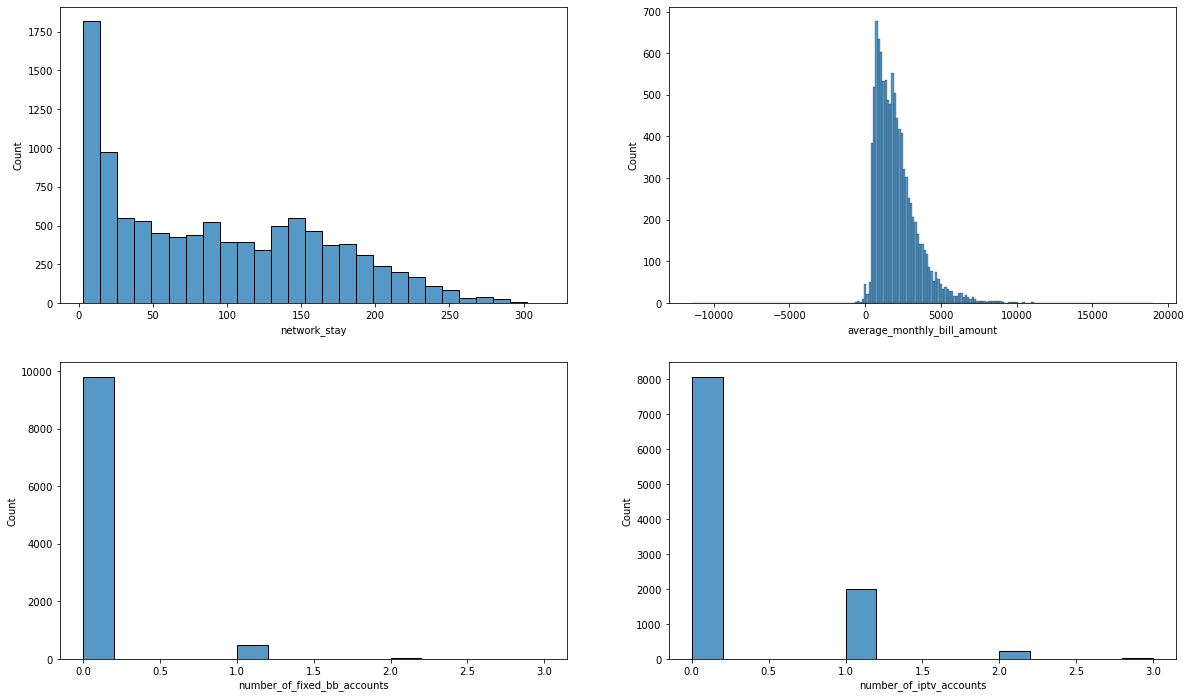

In [4]:
#distribution plot
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Use the axes for plotting
sns.histplot(df_train_new['network_stay'], ax=axes[0,0]);
# axes[0,0].set_xlabel('Year')
# axes[0,0].set_ylabel('Yield (tons per hectare)')
# axes[0,0].legend(['Apples', 'Oranges']);
# axes[0,0].set_title('Crop Yields in Kanto')

# Pass the axes into seaborn
sns.histplot(df_train_new['average_monthly_bill_amount'], ax=axes[0,1]);

# Use the axes for plotting
sns.histplot(df_train_new['number_of_fixed_bb_accounts'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.histplot(df_train_new['number_of_iptv_accounts'], ax=axes[1,1]);

plt.plot(pad=2);

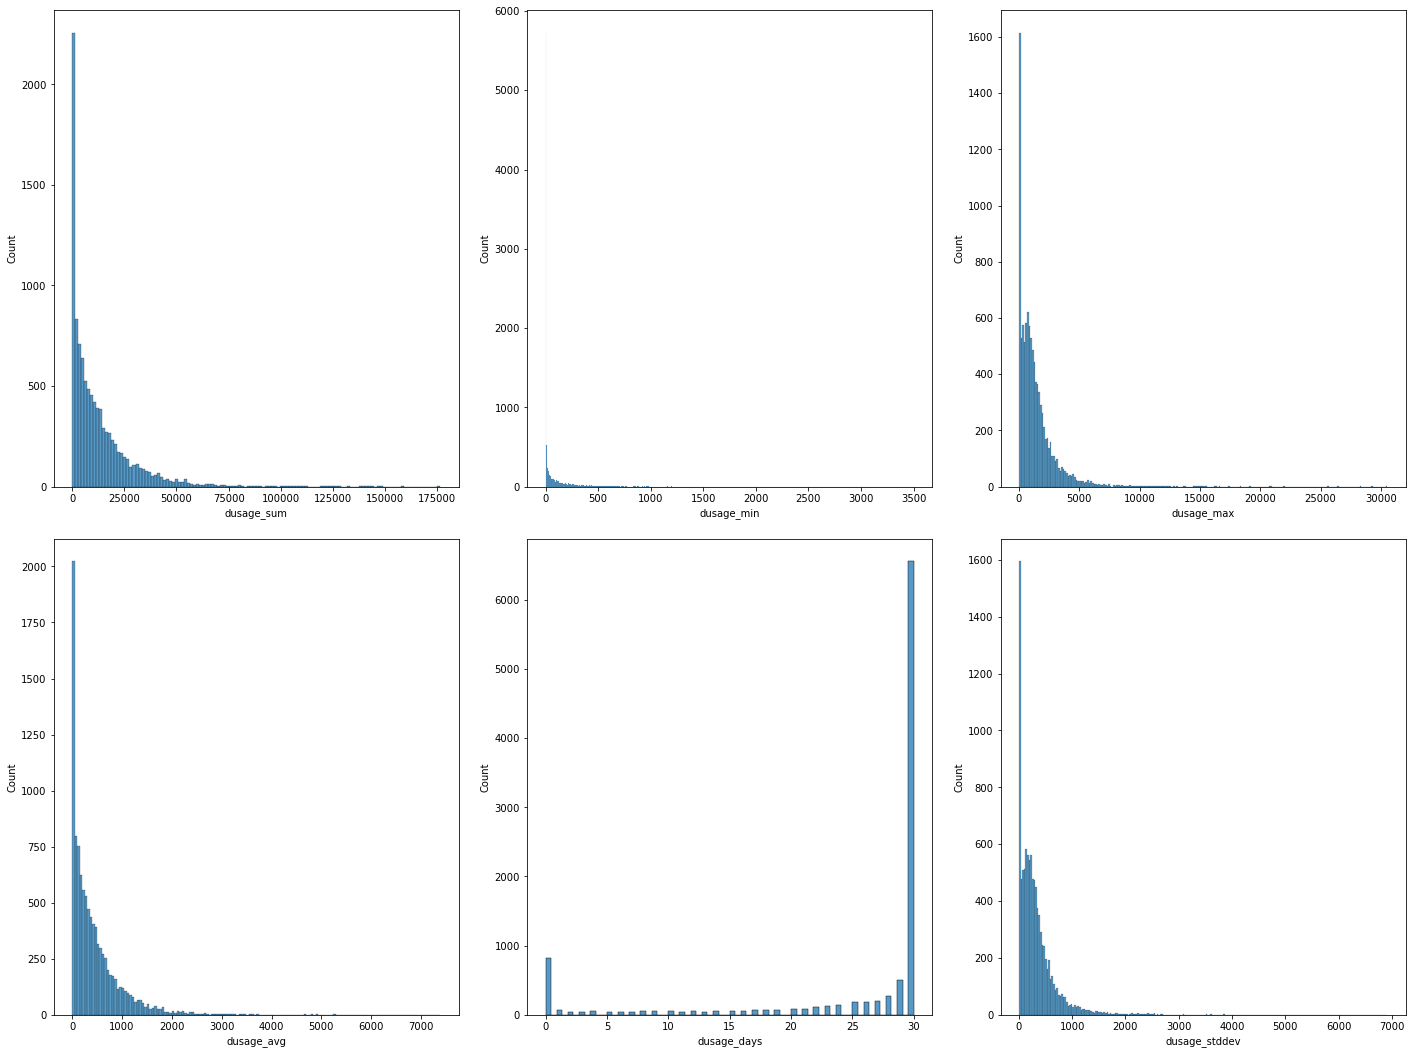

In [5]:
#dusage distribution plot
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Use the axes for plotting
sns.histplot(df_train_new['dusage_sum'], ax=axes[0,0]);
# axes[0,0].set_xlabel('Year')
# axes[0,0].set_ylabel('Yield (tons per hectare)')
# axes[0,0].legend(['Apples', 'Oranges']);
# axes[0,0].set_title('Crop Yields in Kanto')

# Pass the axes into seaborn
sns.histplot(df_train_new['dusage_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.histplot(df_train_new['dusage_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.histplot(df_train_new['dusage_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.histplot(df_train_new['dusage_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.histplot(df_train_new['dusage_stddev'], ax=axes[1,2]);

plt.tight_layout(pad=2);

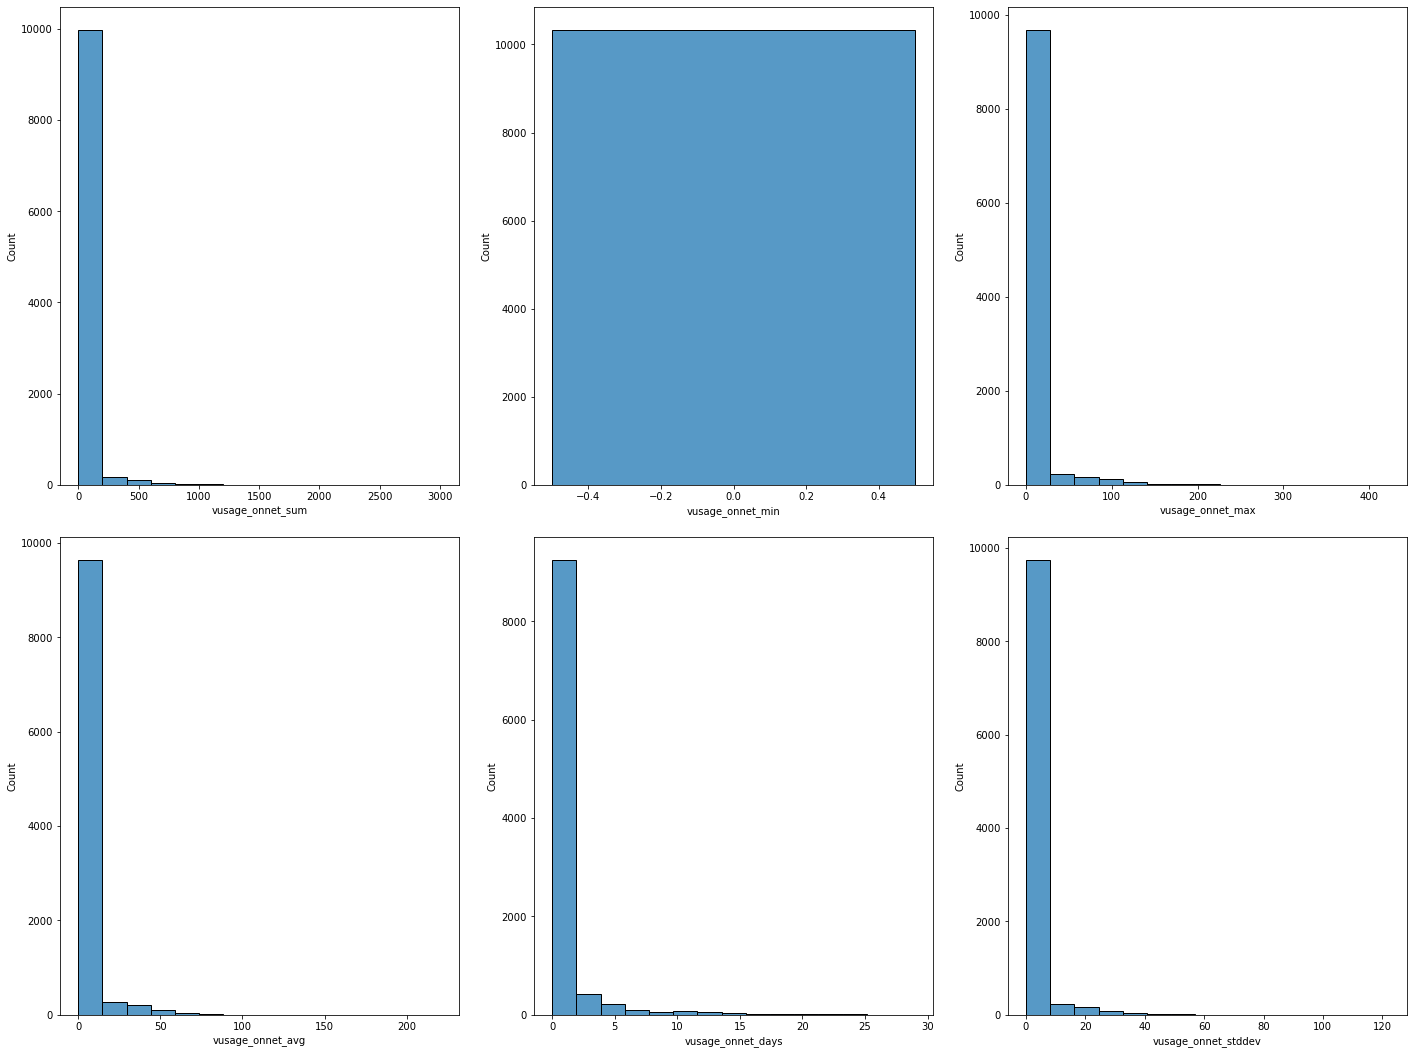

In [6]:
#vusage onnet distribution plot
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Use the axes for plotting
sns.histplot(df_train_new['vusage_onnet_sum'], ax=axes[0,0]);
# axes[0,0].set_xlabel('Year')
# axes[0,0].set_ylabel('Yield (tons per hectare)')
# axes[0,0].legend(['Apples', 'Oranges']);
# axes[0,0].set_title('Crop Yields in Kanto')

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_onnet_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.histplot(df_train_new['vusage_onnet_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_onnet_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_onnet_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_onnet_stddev'], ax=axes[1,2]);

plt.tight_layout(pad=2);

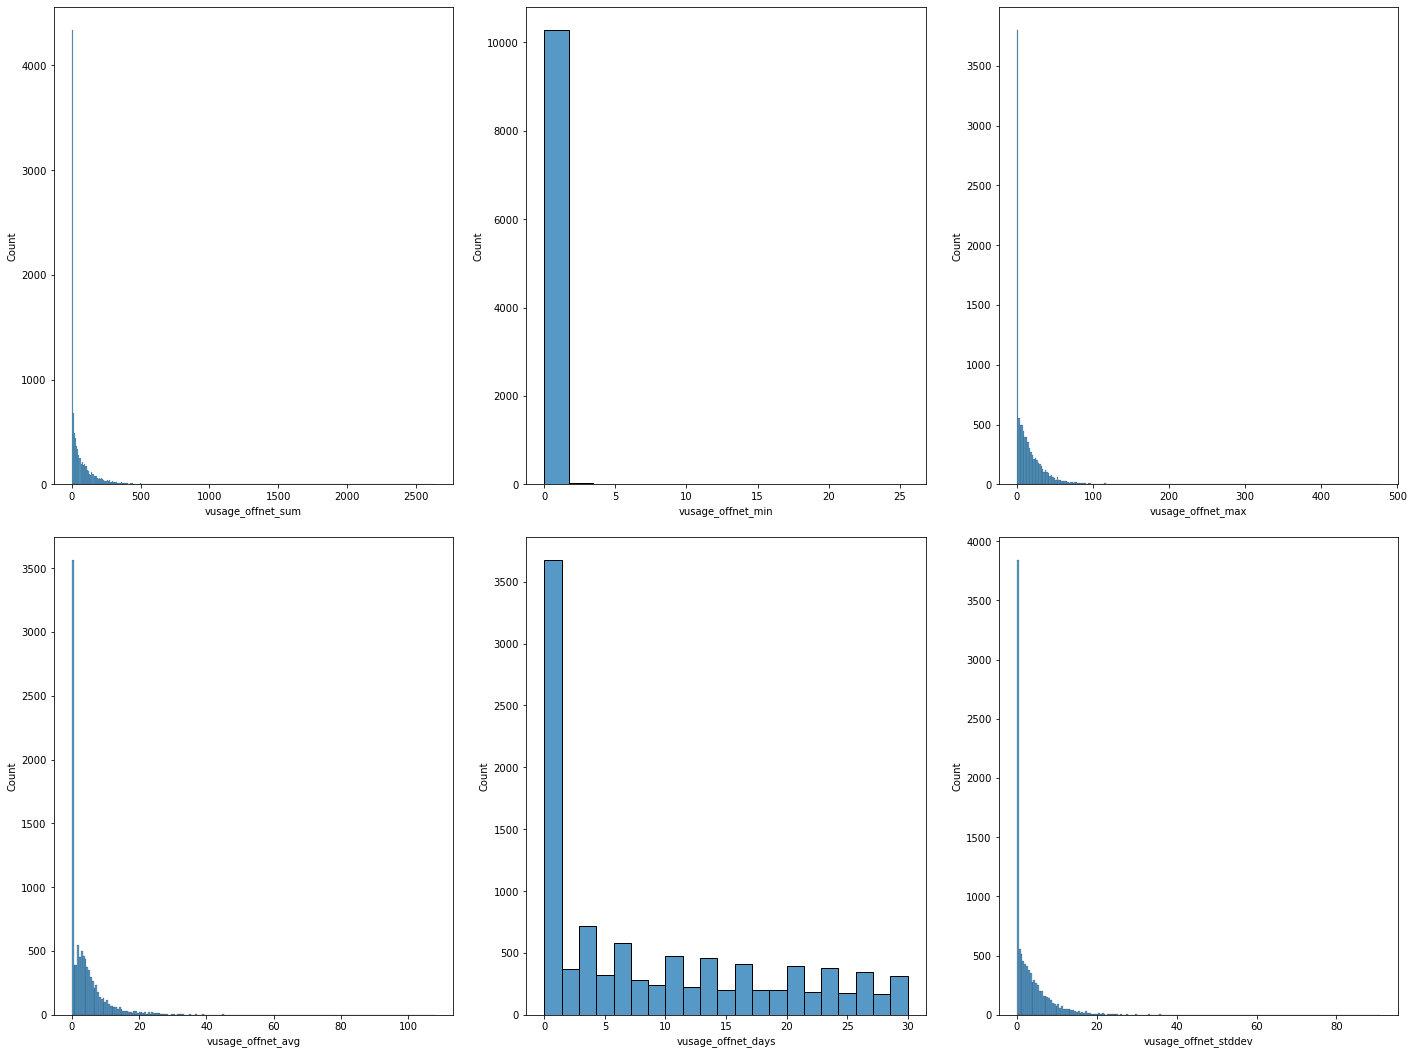

In [7]:
#vusage onnet distribution plot
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Use the axes for plotting
sns.histplot(df_train_new['vusage_offnet_sum'], ax=axes[0,0]);
# axes[0,0].set_xlabel('Year')
# axes[0,0].set_ylabel('Yield (tons per hectare)')
# axes[0,0].legend(['Apples', 'Oranges']);
# axes[0,0].set_title('Crop Yields in Kanto')

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_offnet_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.histplot(df_train_new['vusage_offnet_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_offnet_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_offnet_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_offnet_stddev'], ax=axes[1,2]);

plt.tight_layout(pad=2);

[]

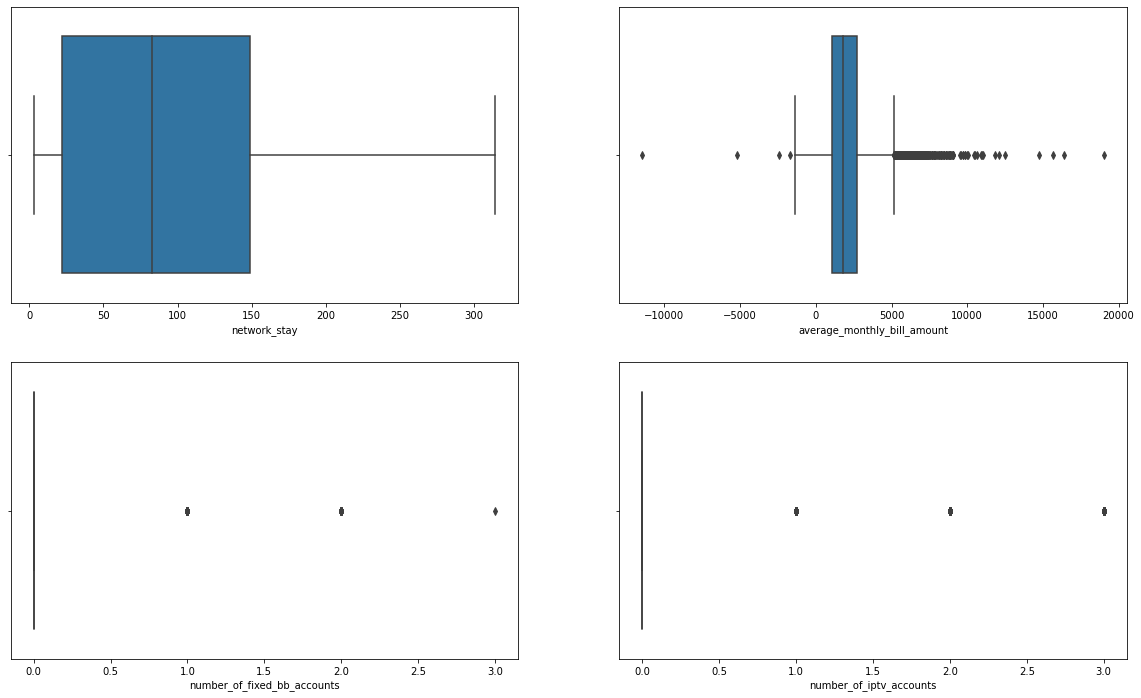

In [8]:
#box plots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Use the axes for plotting
sns.boxplot(x=df_train_new['network_stay'], ax=axes[0,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['average_monthly_bill_amount'], ax=axes[0,1]);

# Use the axes for plotting
sns.boxplot(x=df_train_new['number_of_fixed_bb_accounts'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['number_of_iptv_accounts'], ax=axes[1,1]);

plt.plot(pad=2);


[]

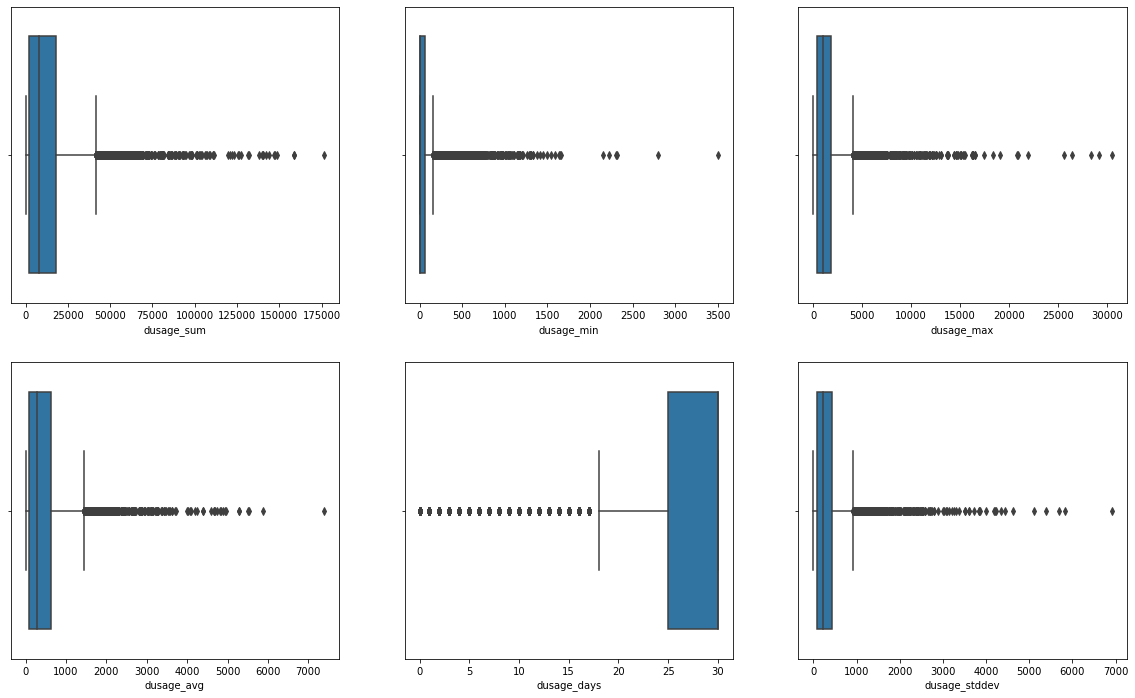

In [9]:
# dusage box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Use the axes for plotting
sns.boxplot(x=df_train_new['dusage_sum'], ax=axes[0,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['dusage_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.boxplot(x=df_train_new['dusage_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['dusage_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['dusage_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['dusage_stddev'], ax=axes[1,2]);

plt.plot(pad=2);


[]

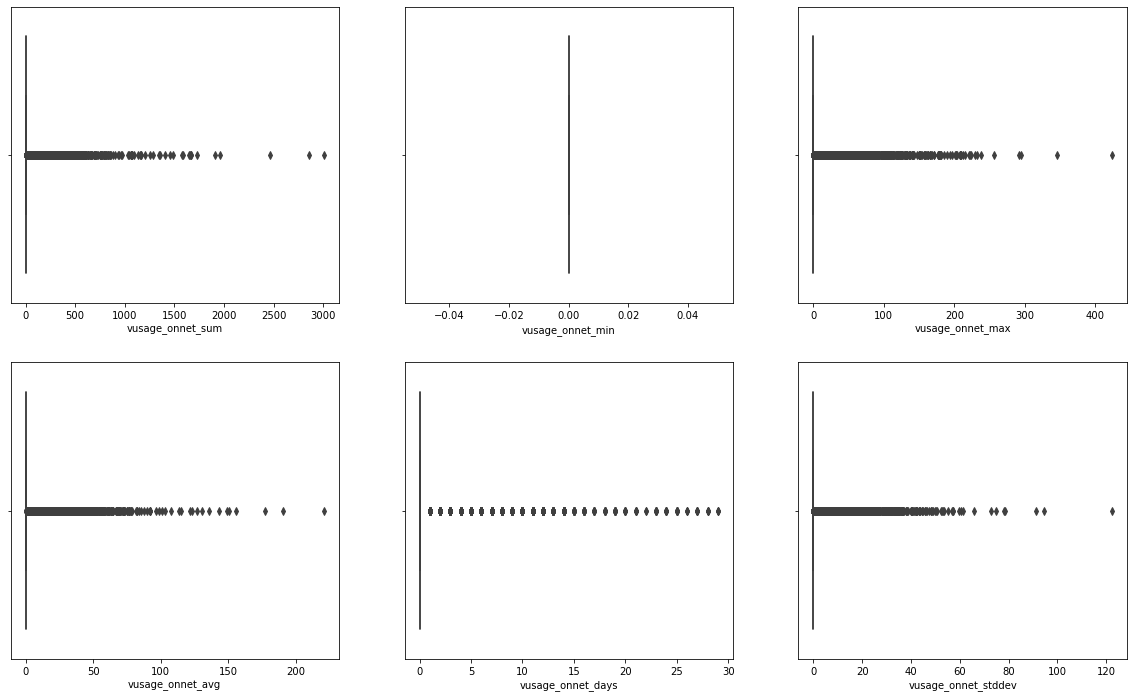

In [10]:
# vusage onnet box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Use the axes for plotting
sns.boxplot(x=df_train_new['vusage_onnet_sum'], ax=axes[0,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_onnet_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.boxplot(x=df_train_new['vusage_onnet_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_onnet_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_onnet_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_onnet_stddev'], ax=axes[1,2]);

plt.plot(pad=2);


[]

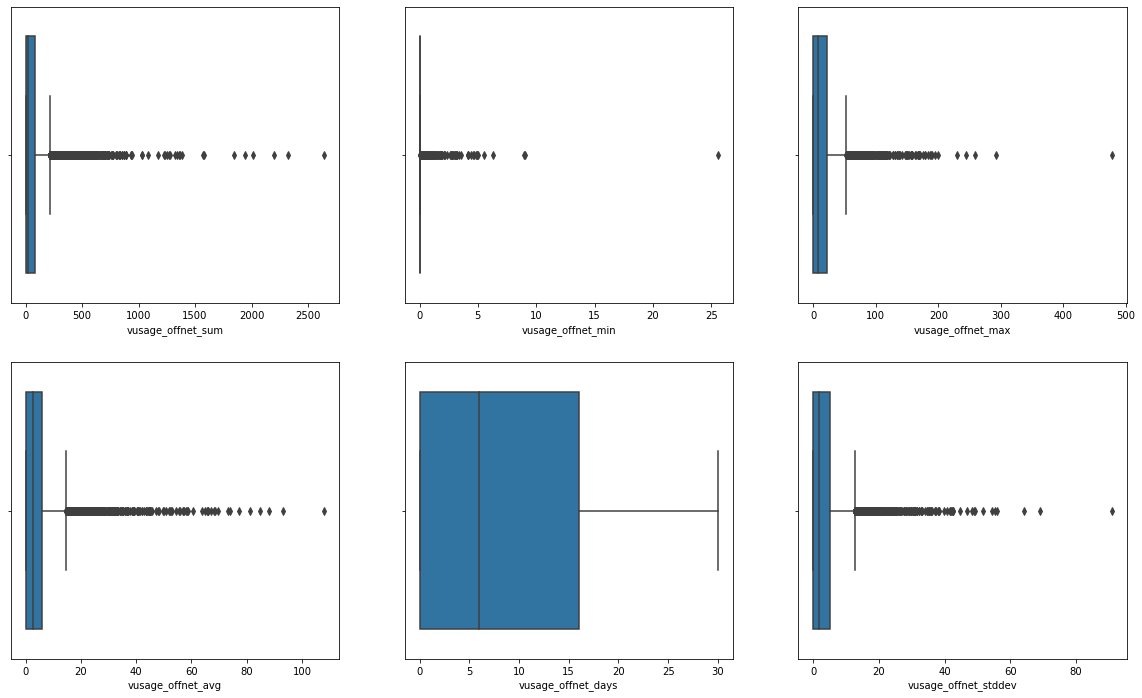

In [11]:
# vusage offnet box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Use the axes for plotting
sns.boxplot(x=df_train_new['vusage_offnet_sum'], ax=axes[0,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_offnet_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.boxplot(x=df_train_new['vusage_offnet_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_offnet_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_offnet_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_offnet_stddev'], ax=axes[1,2]);

plt.plot(pad=2);


In [224]:
selected_features = [
                     'network_stay',
                     'average_monthly_bill_amount',
                     'dusage_sum',
                     'dusage_max',
                     'dusage_stddev',
                     'vusage_onnet_sum',
                     'vusage_onnet_max',
                     'vusage_onnet_stddev',
                     'vusage_offnet_sum',
                     'vusage_offnet_max',
                     'vusage_offnet_stddev',
                     ]
temp = df_train_new.copy()

In [225]:
l = len(selected_features)

In [226]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     df_in[df_in[col_name] < fence_low] = fence_low
#     df_in[df_in[col_name] > fence_high] = fence_high
#     return df_in

# for col in selected_features:
#     df_cl = remove_outlier(temp, col)

In [227]:
# removing outliers
temp['average_monthly_bill_amount'].loc[temp['average_monthly_bill_amount'] > 5000] = 5000
temp['average_monthly_bill_amount'].loc[temp['average_monthly_bill_amount'] < 0] = 0

temp['dusage_sum'].loc[temp['dusage_sum'] > 35000] = 35000
temp['dusage_sum'].loc[temp['dusage_sum'] < 0] = 0

temp['dusage_max'].loc[temp['dusage_max'] > 4000] = 4000
temp['dusage_max'].loc[temp['dusage_max'] < 0] = 0

temp['dusage_stddev'].loc[temp['dusage_stddev'] > 700] = 800
temp['dusage_stddev'].loc[temp['dusage_stddev'] < 0] = 0

temp['vusage_onnet_sum'].loc[temp['vusage_onnet_sum'] > 27] = 27
temp['vusage_onnet_sum'].loc[temp['vusage_onnet_sum'] < 0] = 0

temp['vusage_onnet_max'].loc[temp['vusage_onnet_max'] > 10] = 10
temp['vusage_onnet_max'].loc[temp['vusage_onnet_max'] < 0] = 0

temp['vusage_onnet_stddev'].loc[temp['vusage_onnet_stddev'] > 10] = 10
temp['vusage_onnet_stddev'].loc[temp['vusage_onnet_stddev'] < 0] = 0

temp['vusage_offnet_sum'].loc[temp['vusage_offnet_sum'] > 120] = 120
temp['vusage_offnet_sum'].loc[temp['vusage_offnet_sum'] < 0] = 0

temp['vusage_offnet_max'].loc[temp['vusage_offnet_max'] > 38] = 38
temp['vusage_offnet_max'].loc[temp['vusage_offnet_max'] < 0] = 0

temp['vusage_offnet_stddev'].loc[temp['vusage_offnet_stddev'] > 13] = 13
temp['vusage_offnet_stddev'].loc[temp['vusage_offnet_stddev'] < 0] = 0



C:\Users\ZUBAIR\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


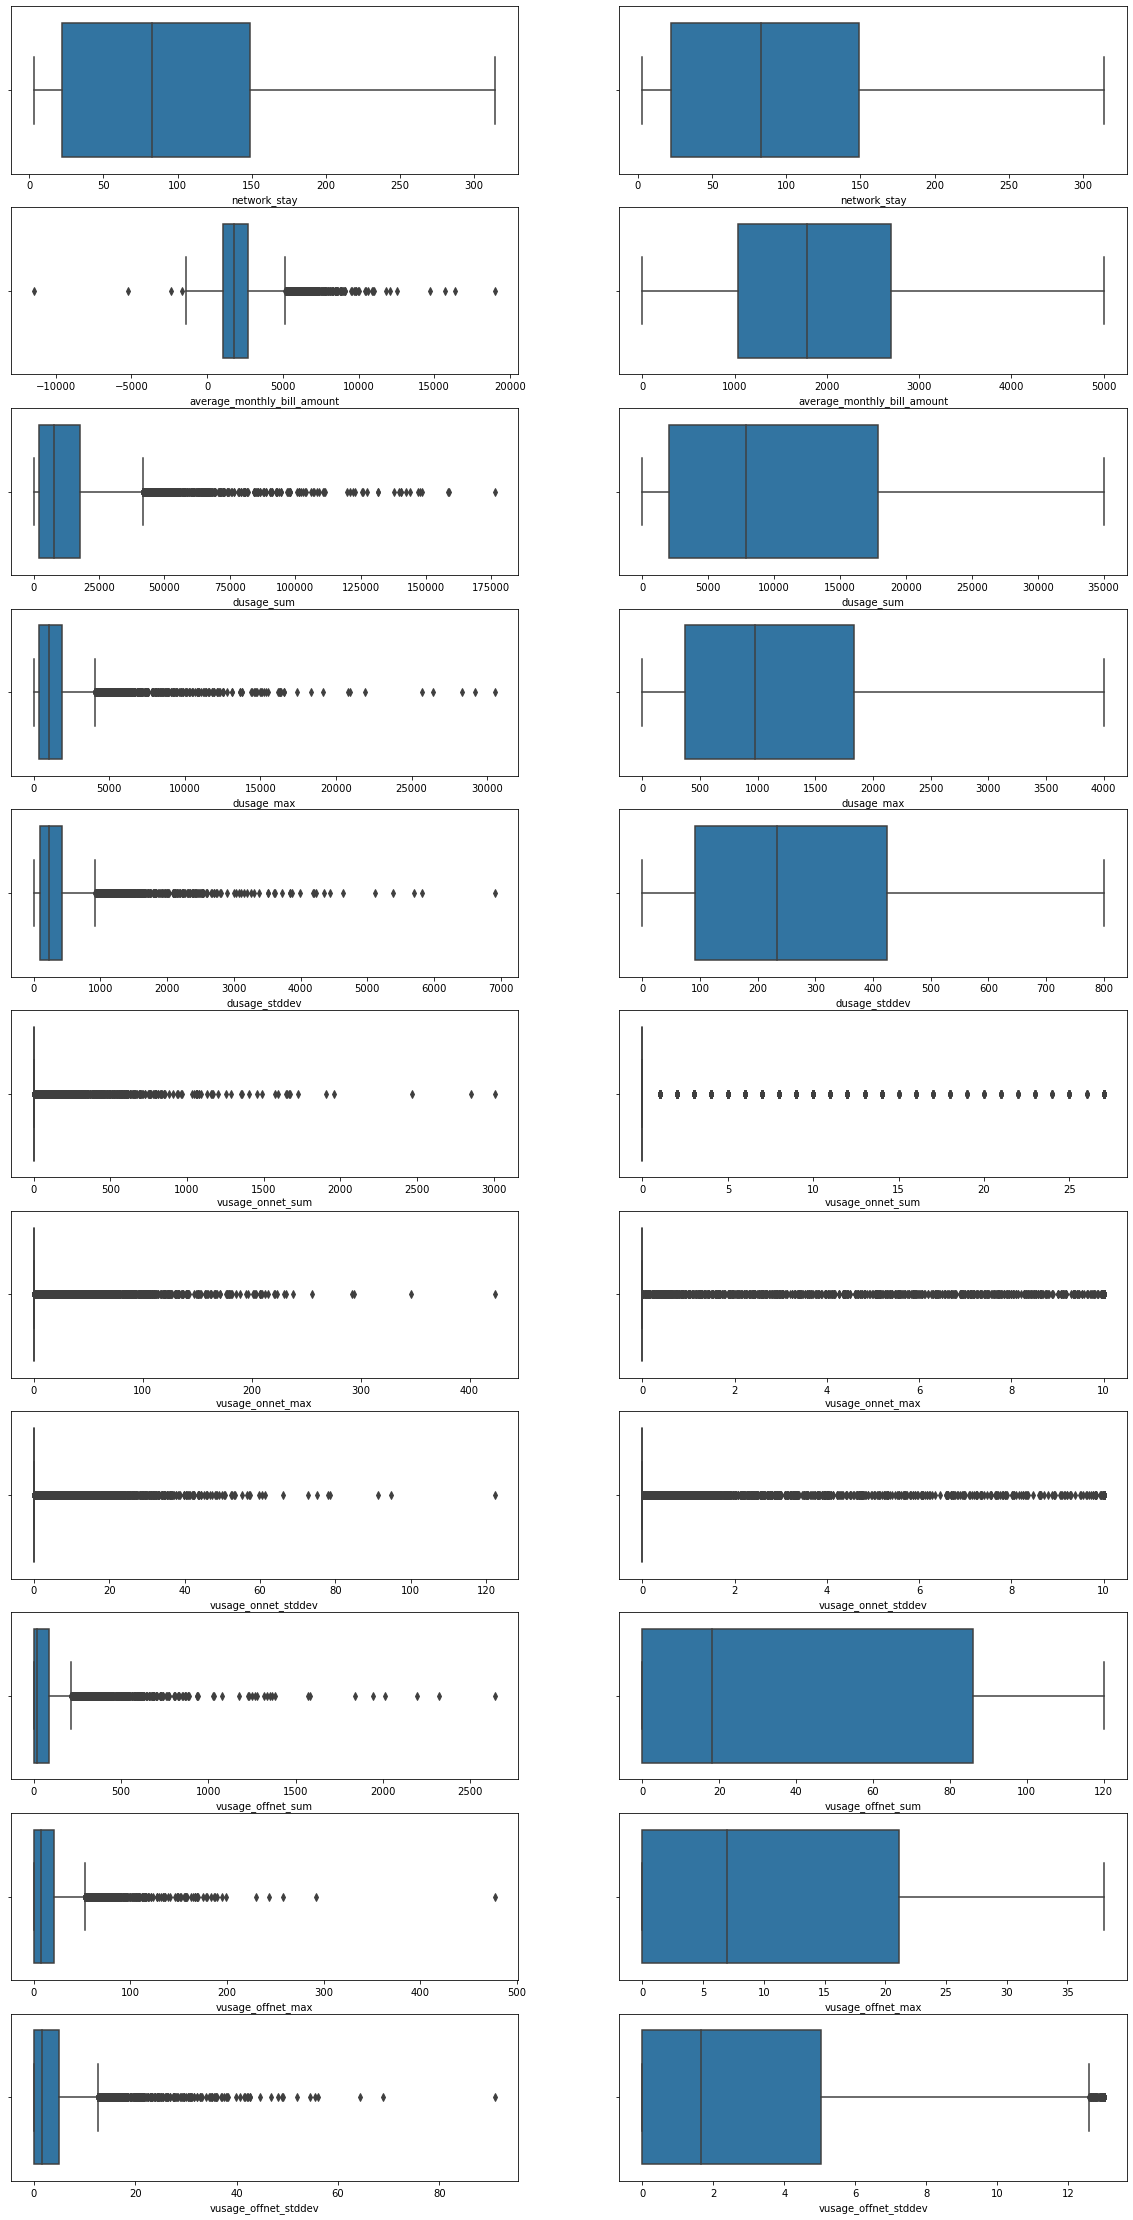

In [228]:
# plotting before after comparison of removing outliers
fig, axes = plt.subplots( l,2, figsize=(20, 40));

for i in range (l):
    sns.boxplot(x=temp[selected_features[i]], ax=axes[i,1]);
    
    sns.boxplot(x=df_train_new[selected_features[i]], ax=axes[i,0]);

    plt.plot(pad=2);

In [229]:
# temp.to_csv('train_cleaned.csv',index=False)

In [241]:
df_test = pd.read_csv('test_dataset.csv',low_memory=False)
df_test.head()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count
0,2003793,4G,Smartphone,MALE,Colombo,40-50,4,689.42,148.0,0.000000,148.146634,37.037382,4.0,38.251243,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,1.0,NaN,NaN
1,1776101,4G,Smartphone,MALE,Colombo,40-50,7,799.93,300.0,0.180222,119.466825,10.027957,30.0,24.125172,0.0,0.0,0.0,0.0,NaN,0.0,107.0,16.266667,0.0,21.0,5.107143,4.924111,0.0,0.0,NaN,NaN
2,6945050,2G,Basic,MALE,Colombo,20-30,20,1538.45,8215.0,0.000000,4048.511104,2053.950266,4.0,932.358667,0.0,0.0,0.0,0.0,NaN,0.0,108.0,90.000000,0.0,8.0,13.558333,16.397071,0.0,0.0,110.0,2.0
3,2472049,4G,Smartphone,FEMALE,Matara,40-50,10,995.75,11613.0,0.000000,1057.448432,430.118721,27.0,268.457304,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.416667,0.0,2.0,0.333333,0.087355,0.0,0.0,NaN,NaN
4,7197266,4G,Smartphone,MALE,Kandy,30-40,154,553.61,26505.0,28.515345,2490.832742,883.505624,30.0,660.353290,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,350.0,1.0


In [231]:
df_test.isnull().sum()

primary_identifier                0
device_type                      13
device_category                  16
gender                           55
district_name                     0
age_group                        55
network_stay                      0
average_monthly_bill_amount       0
dusage_sum                        0
dusage_min                        0
dusage_max                        0
dusage_avg                      364
dusage_days                       0
dusage_stddev                     0
vusage_onnet_sum                  0
vusage_onnet_max                  0
vusage_onnet_min                  0
vusage_onnet_days                 0
vusage_onnet_avg               3715
vusage_onnet_stddev               0
vusage_offnet_sum                 0
vusage_offnet_max                 0
vusage_offnet_min                 0
vusage_offnet_days                0
vusage_offnet_avg              1426
vusage_offnet_stddev              0
number_of_fixed_bb_accounts       0
number_of_iptv_accounts     

In [242]:
cols_to_drop = ['vusage_onnet_avg','vusage_offnet_avg','dusage_avg','add_on_tot_rental','add_on_count']
df_test.drop(cols_to_drop,axis=1,inplace=True)

In [243]:
df_test.fillna(-1,inplace=True)
#df_test.isnull().sum()

In [246]:
#converting categorical values to numerical values
df_test['device_type'] = pd.factorize(df_test['device_type'])[0];
df_test['device_category'] = pd.factorize(df_test['device_category'])[0];
df_test['gender'] = pd.factorize(df_test['gender'])[0];
df_test['age_group'] = pd.factorize(df_test['age_group'])[0];
df_test['district_name'] = pd.factorize(df_test['district_name'])[0];
df_test['vusage_offnet_days'] = df_test['vusage_offnet_days'].astype(int)
df_test.shape

(4500, 25)

In [247]:
# df_test.to_csv('test_data.csv',index=False)

In [235]:
selected_features1 = [
                     'network_stay',
                     'average_monthly_bill_amount',
                     'dusage_sum',
                     'dusage_max',
                     'dusage_stddev',
                     'vusage_offnet_sum',
                     'vusage_offnet_max',
                     'vusage_offnet_stddev',
                     ]
temp1 = df_test.copy()
l = len(selected_features1)

In [237]:
# removing outliers
temp1['average_monthly_bill_amount'].loc[temp1['average_monthly_bill_amount'] > 5000] = 5000
temp1['average_monthly_bill_amount'].loc[temp1['average_monthly_bill_amount'] < 0] = 0

temp1['dusage_sum'].loc[temp1['dusage_sum'] > 35000] = 35000
temp1['dusage_sum'].loc[temp1['dusage_sum'] < 0] = 0

temp1['dusage_max'].loc[temp1['dusage_max'] > 4000] = 4000
temp1['dusage_max'].loc[temp1['dusage_max'] < 0] = 0

temp1['dusage_stddev'].loc[temp1['dusage_stddev'] > 700] = 800
temp1['dusage_stddev'].loc[temp1['dusage_stddev'] < 0] = 0

temp1['vusage_offnet_sum'].loc[temp1['vusage_offnet_sum'] > 120] = 120
temp1['vusage_offnet_sum'].loc[temp1['vusage_offnet_sum'] < 0] = 0

temp1['vusage_offnet_max'].loc[temp1['vusage_offnet_max'] > 38] = 38
temp1['vusage_offnet_max'].loc[temp1['vusage_offnet_max'] < 0] = 0

temp1['vusage_offnet_stddev'].loc[temp1['vusage_offnet_stddev'] > 13] = 13
temp1['vusage_offnet_stddev'].loc[temp1['vusage_offnet_stddev'] < 0] = 0



C:\Users\ZUBAIR\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


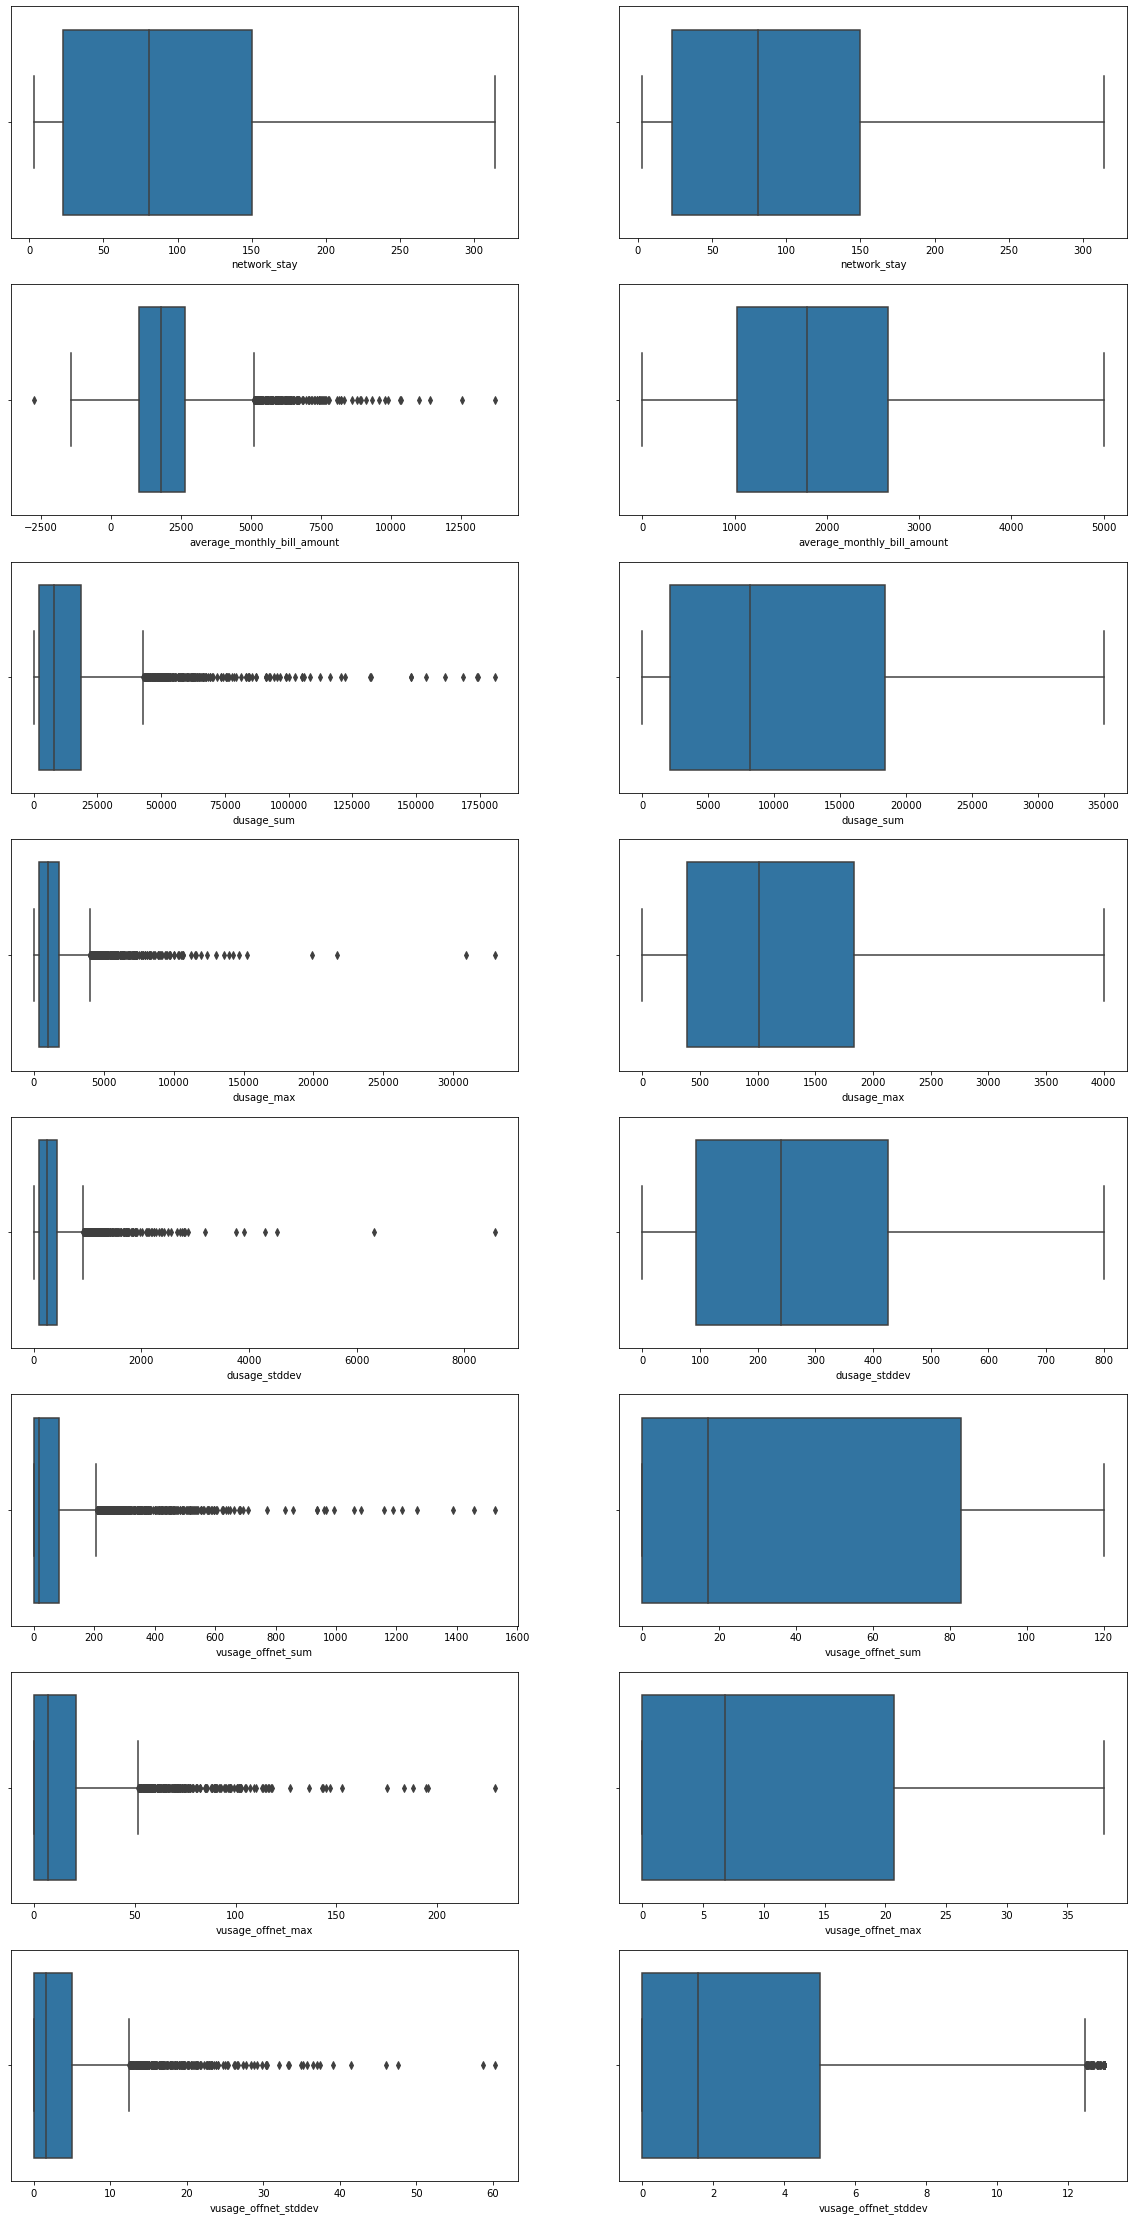

In [238]:
fig, axes = plt.subplots( l,2, figsize=(20, 40));

for i in range (l):
    sns.boxplot(x=temp1[selected_features1[i]], ax=axes[i,1]);
    
    sns.boxplot(x=df_test[selected_features1[i]], ax=axes[i,0]);

    plt.plot(pad=2);

In [240]:
# temp1.to_csv("test_cleaned.csv",index=False)